<a href="https://colab.research.google.com/github/1218muskan/MLnow_2.0/blob/main/Univariate_Linear_Regression_and_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DATASET: [Students Performance in Exams](https://www.kaggle.com/spscientist/students-performance-in-exams)

**Date Created**: June 10, 2021

**Author**: Muskan Gupta

**Reach out**:
 [GitHub](https://github.com/1218muskan) | [LinkedIn](https://www.linkedin.com/in/muskan-gupta-a05523204)

[[Course Repository](https://github.com/1218muskan/MLnow_2.0)]

# Exploratory Data Analysis (EDA)

In [ ]:
# mounting with google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [49]:
cd '/content/drive/MyDrive/Learning_ML/EDA'

/content/drive/MyDrive/Learning_ML/EDA


In [50]:
import pandas as pd 
import numpy as np 
import tensorflow as tf 
from tensorflow import keras 
import os 

In [51]:
df = pd.read_csv('StudentsPerformance.csv') 

In [ ]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


## Data Processing

categorical to numeric value conversion

In [ ]:
print('Gender:',df['gender'].unique())
print('Race:',df['race/ethnicity'].unique())
print('Parent\'s Education:',df['parental level of education'].unique())
print('lunch:',df['lunch'].unique())
print('Preparation course:',df['test preparation course'].unique())

Gender: ['female' 'male']
Race: ['group B' 'group C' 'group A' 'group D' 'group E']
Parent's Education: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
lunch: ['standard' 'free/reduced']
Preparation course: ['none' 'completed']


In [ ]:
#binary valued

df['gender'] = df['gender'].apply({'female':1, 'male':2}.get)
df['lunch'] = df['lunch'].apply({'standard':1, 'free/reduced':2}.get)
df['test preparation course'] = df['test preparation course'].apply({'none':1, 'completed':2}.get)

#multi-valued

df['race/ethnicity'] = df['race/ethnicity'].apply({'group A':1, 'group B':2, 'group C':3, 'group D':4, 'group E':5}.get)
df['parental level of education'] = df['parental level of education'].apply({'bachelor\'s degree':1, 'some college':2, 'master\'s degree':3, 'associate\'s degree':4, 'high school':5, 'some high school':6}.get)


df.head(15)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,1,2,1,1,1,72,72,74
1,1,3,2,1,2,69,90,88
2,1,2,3,1,1,90,95,93
3,2,1,4,2,1,47,57,44
4,2,3,2,1,1,76,78,75
5,1,2,4,1,1,71,83,78
6,1,2,2,1,2,88,95,92
7,2,2,2,2,1,40,43,39
8,2,4,5,2,2,64,64,67
9,1,2,5,2,1,38,60,50


In [ ]:
df.to_csv('cleanedDataset.csv')

In [ ]:
ls

cleanedDataset.csv  Student/  StudentsPerformance.csv


## Data Visualization

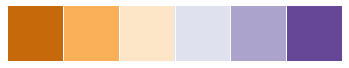

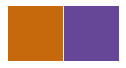

In [52]:
import seaborn as sns

sns.palplot(sns.color_palette('PuOr')) 
# The function palplot() creates a plot for the colors of the palette.

pal = sns.color_palette('PuOr', 6) #print 6 color shades from Purple to Orange
pal.as_hex() #set hex code values for colors


import matplotlib.pyplot as plt

plt.style.use(['seaborn'])
sns_colors = ['#c6690c', '#664697'] #orange Purple hex codes
sns.set_palette(sns_colors) #set the palette as sns_colors 
sns.palplot(sns.color_palette(sns_colors)) #plot the color codes

In [ ]:
print(f''''There are {len(df.columns)} in the dataframe mathData namely,

{df.columns}''')  #columns in the dataframe

'There are 8 in the dataframe mathData namely,

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')


### Pair Plot

A pair plot is a plot where the ```x``` 
axis and  ```y``` axis will have all the columns you specify with it

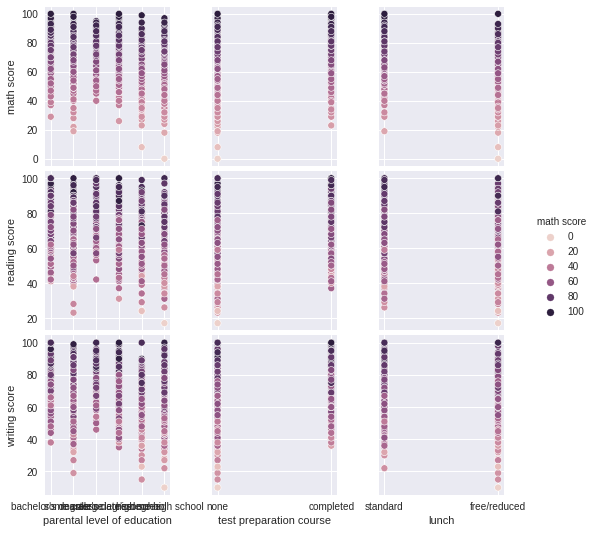

In [54]:
sns.pairplot(df,
             x_vars = [ 'parental level of education','test preparation course','lunch'],
             y_vars = [ 'math score', 'reading score', 'writing score'],
       diag_kind='kde' , hue='math score'
             )

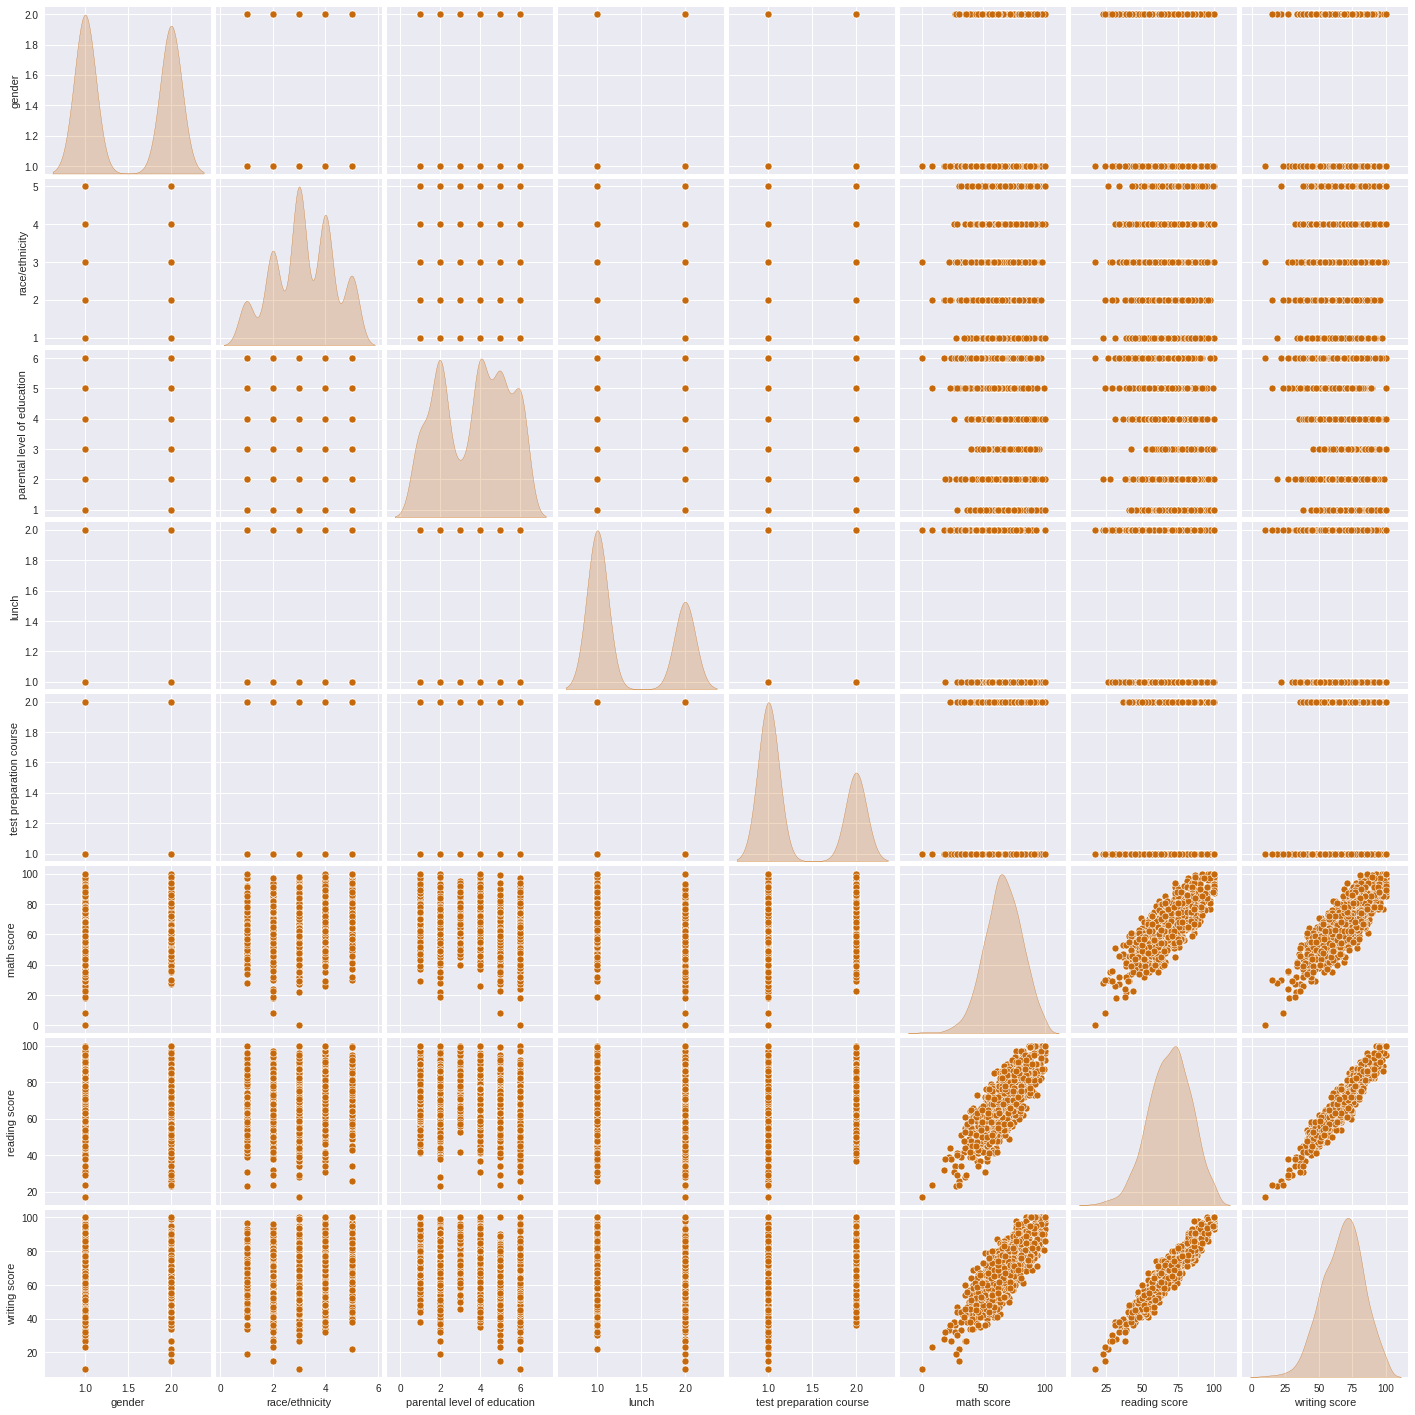

In [ ]:
#pairplot for all the values

sns.pairplot(df,
             x_vars = ['gender','race/ethnicity','parental level of education','lunch','test preparation course','math score', 'reading score', 'writing score' ],
             y_vars = ['gender','race/ethnicity','parental level of education','lunch','test preparation course','math score', 'reading score', 'writing score' ],
       diag_kind='kde'
             )

### Strip plot

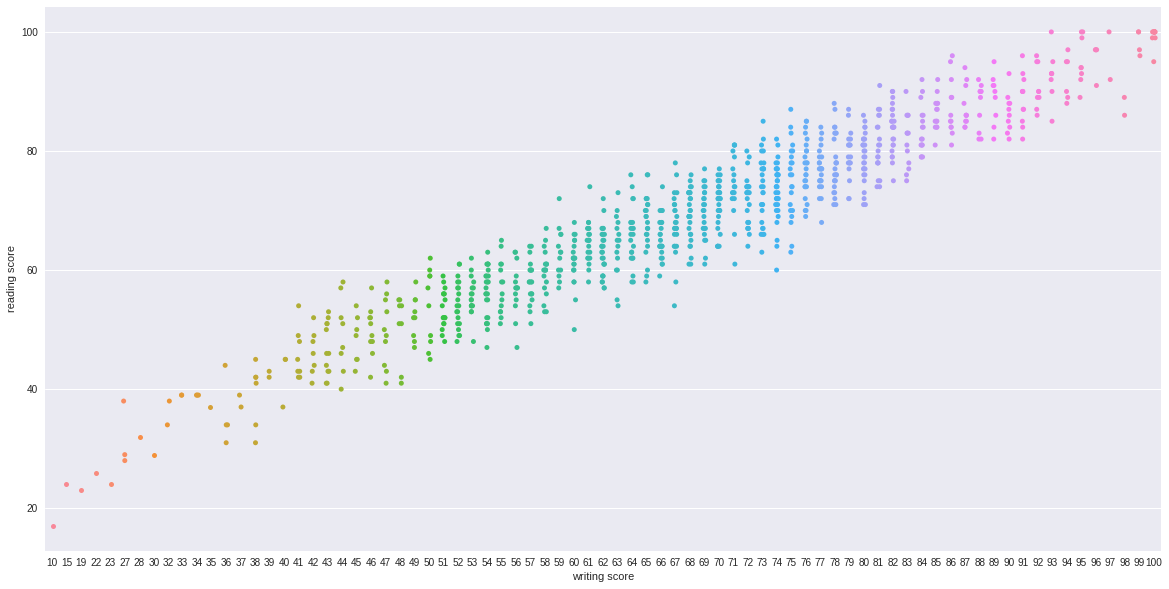

In [ ]:
fig = plt.subplots(figsize=(20,10))
sns.stripplot(y='reading score',x='writing score',data=df)

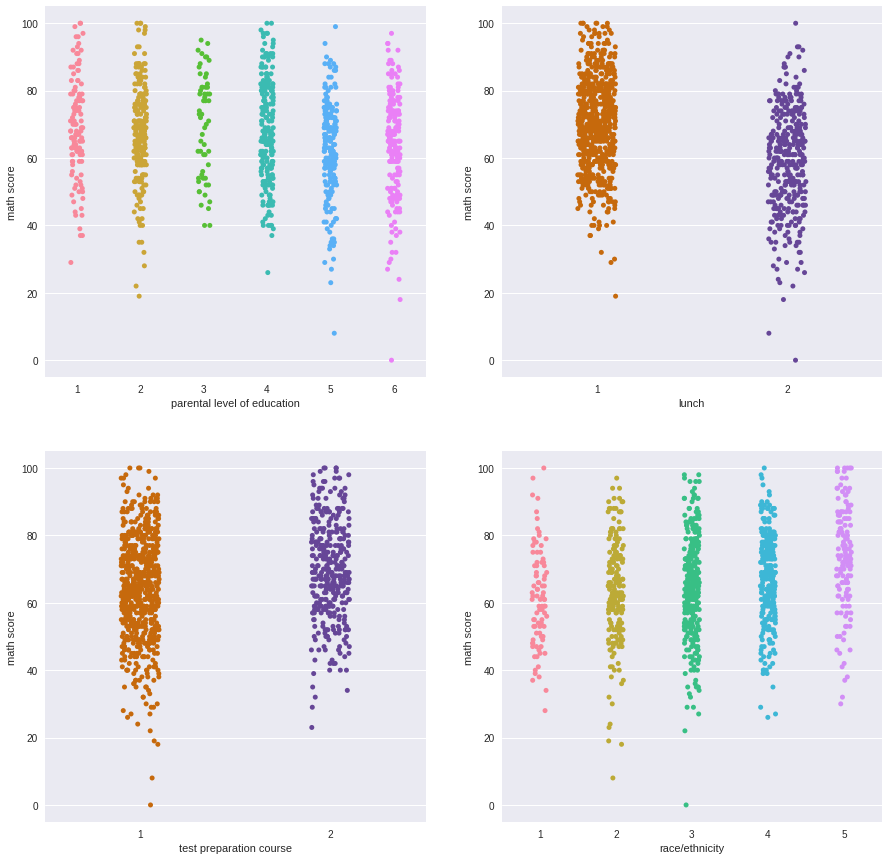

In [ ]:
fig, axarr = plt.subplots(2,2, figsize=(15,15))

sns.stripplot(x='parental level of education', y='math score', data=df, hue=None, ax=axarr[0][0])
sns.stripplot(x='lunch', y='math score', data=df, hue=None, ax=axarr[0][1])
sns.stripplot(x='test preparation course', y='math score', data=df, hue=None, ax=axarr[1][0])
sns.stripplot(x='race/ethnicity', y='math score', data=df, hue=None,  ax=axarr[1][1])

#Univariate Linear Regression

In [55]:
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


 Now, going to consider the columns `reading score` and `writing score` for univariate linear regression

$WritingScore_i = ReadingScore_i  \cdot \theta_1 + \theta_0$

In [ ]:
uniData=df[['reading score','writing score']]
uniData.head(5)

,reading score,writing score
0,72,74
1,90,88
2,95,93
3,57,44
4,78,75


In [ ]:
uniData.to_csv('univariate_Dataset.csv')

In [ ]:
ls

cleanedDataset.csv  Student/  StudentsPerformance.csv  univariate_Dataset.csv


## Data Visualization

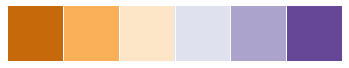

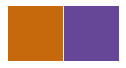

In [ ]:
import seaborn as sns
sns.palplot(sns.color_palette('PuOr')) 
pal = sns.color_palette('PuOr', 6) 
pal.as_hex() 

import matplotlib.pyplot as plt
plt.style.use(['seaborn'])
sns_colors = ['#c6690c', '#664697'] 
sns.set_palette(sns_colors) 
sns.palplot(sns.color_palette(sns_colors)) 

In [ ]:
uniData.columns

Index(['reading score', 'writing score'], dtype='object')

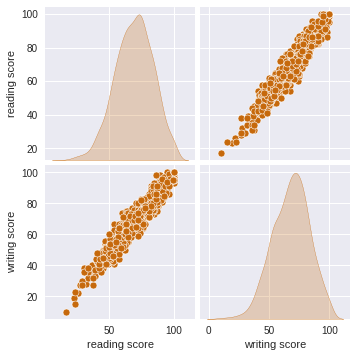

In [ ]:
#pairplot for all the values

sns.pairplot(uniData,
             x_vars = ['reading score', 'writing score'],
             y_vars =  ['reading score', 'writing score'],
       diag_kind='kde'
             )

## Data Splits

In [74]:
trainDataset = uniData.sample(frac=0.75, random_state=0) 
testDataset = uniData.drop(trainDataset.index)

print(trainDataset.head())
print(testDataset.head())

     reading score  writing score
993             72             74
859             73             72
298             46             50
553             62             64
672             78             76
    reading score  writing score
9              60             50
11             52             43
19             58             61
23             73             73
24             71             80


In [75]:
print(trainDataset.shape)
print(testDataset.shape)

(750, 2)
(250, 2)


In [76]:
trainFeatures = trainDataset.copy()
testFeatures = testDataset.copy()

print(trainFeatures.head())
print(testFeatures.head())

     reading score  writing score
993             72             74
859             73             72
298             46             50
553             62             64
672             78             76
    reading score  writing score
9              60             50
11             52             43
19             58             61
23             73             73
24             71             80


In [77]:
#removing the 'writing score' column and saving it into the labels variable

trainLabels = trainFeatures.pop('writing score')
testLabels = testFeatures.pop('writing score')

print(trainLabels.head())
print(testLabels.head())

993    74
859    72
298    50
553    64
672    76
Name: writing score, dtype: int64
9     50
11    43
19    61
23    73
24    80
Name: writing score, dtype: int64


In [78]:
print(trainFeatures.head())
print(testFeatures.head())

     reading score
993             72
859             73
298             46
553             62
672             78
    reading score
9              60
11             52
19             58
23             73
24             71


## Training Model

In [79]:
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)

])

In [80]:
model.compile(
    loss = 'mean_absolute_error', #minimizing the MAE loss
    optimizer = tf.keras.optimizers.Adam(0.001), #learning rate specified as 0.002
    metrics = ['mae', 'mse'] #meanSquare and meanAbsolute error metrics
)

In [81]:
numEpochs = 2000
history = model.fit(x = trainFeatures, y = trainLabels, validation_data = (testFeatures, testLabels), epochs = numEpochs)

Epoch 1/2000
24/24 [==============================] - 1s 7ms/step - loss: 108.6030 - mae: 108.6030 - mse: 12345.9785 - val_loss: 104.9846 - val_mae: 104.9846 - val_mse: 11536.2178
Epoch 2/2000
24/24 [==============================] - 0s 2ms/step - loss: 106.9107 - mae: 106.9107 - mse: 11965.7402 - val_loss: 103.3318 - val_mae: 103.3318 - val_mse: 11176.7080
Epoch 3/2000
24/24 [==============================] - 0s 2ms/step - loss: 105.2195 - mae: 105.2195 - mse: 11590.9229 - val_loss: 101.6820 - val_mae: 101.6820 - val_mse: 10823.5537
Epoch 4/2000
24/24 [==============================] - 0s 2ms/step - loss: 103.5303 - mae: 103.5303 - mse: 11222.5850 - val_loss: 100.0319 - val_mae: 100.0319 - val_mse: 10476.0078
Epoch 5/2000
24/24 [==============================] - 0s 2ms/step - loss: 101.8378 - mae: 101.8378 - mse: 10860.3535 - val_loss: 98.3827 - val_mae: 98.3827 - val_mse: 10134.3438
Epoch 6/2000
24/24 [==============================] - 0s 2ms/step - loss: 100.1456 - mae: 100.1456 - m

In [82]:
print(history)

In [83]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


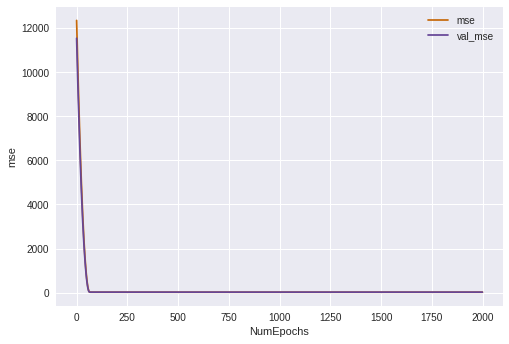

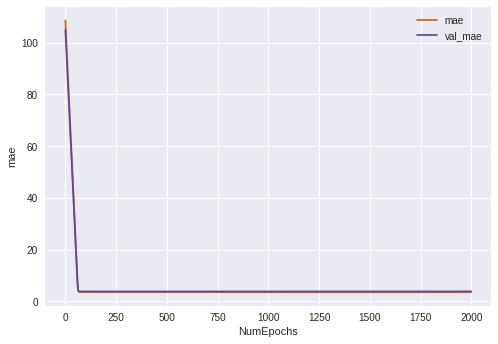

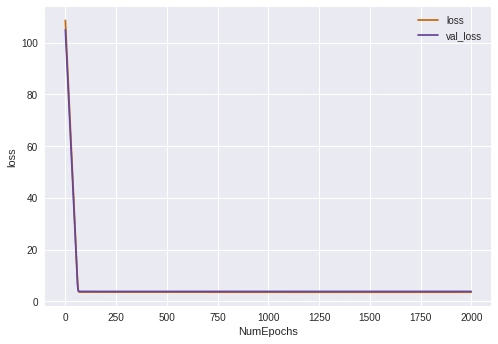

In [84]:
def curvePlots(tempString):
  plt.plot(history.history[tempString])  
  plt.plot(history.history[f'val_{tempString}'])
  plt.xlabel('NumEpochs')
  plt.ylabel(tempString)
  plt.legend([tempString, f'val_{tempString}'])
  plt.show()


curvePlots('mse')
curvePlots('mae')
curvePlots('loss')

## Prediction

In [85]:
#for single values
value=1
print(f'Prediction for input value 1: {model.predict([value])}')
# model.predict should receive a list


# for a list of values
tempListforPreds = [1,2,3,4,5]
print(f'''

input List = {tempListforPreds}


List of Predictions:
{model.predict(tempListforPreds)}

List of Predictions (flattened out):
{model.predict(tempListforPreds).flatten()}
''')

Prediction for input value 1: [[-0.15442038]]


input List = [1, 2, 3, 4, 5]


List of Predictions:
[[-0.15442038]
 [ 0.8483945 ]
 [ 1.8512095 ]
 [ 2.8540244 ]
 [ 3.8568392 ]]

List of Predictions (flattened out):
[-0.15442038  0.8483945   1.8512095   2.8540244   3.8568392 ]



In [86]:
print(testFeatures)

     reading score
9               60
11              52
19              58
23              73
24              71
..             ...
974             63
976             62
980             24
983             87
994             63

[250 rows x 1 columns]


In [87]:
testPreds = model.predict(testFeatures).flatten() #array of all prediction values

In [88]:
print(len(testPreds))
print(testPreds)

250
[59.011658 50.98914  57.00603  72.048256 70.042625 73.05107  69.03981
 71.04544  80.07077  72.048256 57.00603  64.025734 70.042625 77.062325
 53.997585 58.008842 71.04544  62.020103 49.986324 47.980694 45.975067
 37.952545 82.0764   70.042625 32.938473 85.08485  80.07077  66.031364
 66.031364 88.09329  53.997585 76.05951  81.073586 68.036995 88.09329
 56.003216 81.073586 47.980694 83.079216 35.94692  65.02855  60.014473
 41.963806 67.03418  74.05388  99.12425  66.031364 69.03981  49.986324
 74.05388  49.986324 76.05951  67.03418  48.98351  68.036995 50.98914
 63.02292  55.0004   80.07077  68.036995 79.067955 60.014473 61.01729
 85.08485  71.04544  48.98351  71.04544  81.073586 73.05107  63.02292
 72.048256 76.05951  78.06514  40.96099  75.056694 69.03981  84.08203
 77.062325 62.020103 50.98914  81.073586 88.09329  74.05388  72.048256
 59.011658 39.958176 66.031364 50.98914  63.02292  85.08485  51.991955
 44.97225  60.014473 74.05388  67.03418  73.05107  89.09611  63.02292
 76.05951

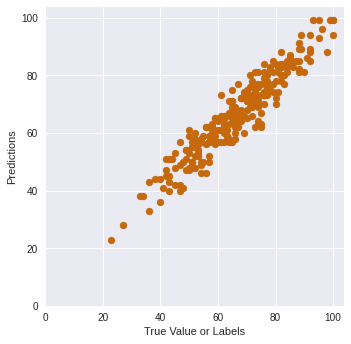

In [89]:
# prediciton plot --> how well is your model predicting across the actual labels

def predPlot(labels, predictions):
  plt.scatter(labels, predictions)
  plt.ylabel('Predictions')
  plt.xlabel('True Value or Labels')
  plt.axis('equal')
  plt.axis('square')
  plt.xlim([0, plt.xlim()[1]])
  plt.ylim([0, plt.ylim()[1]])
  plt.show()

predPlot(testLabels, testPreds)

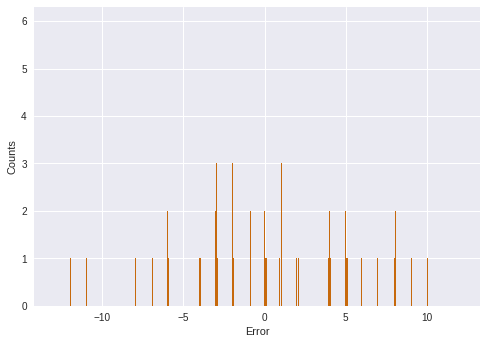

In [90]:
#error plot --> gaussian distribution (normal distribution)
# most of our values centered around zero

#if not a gaussian curve: model is not predicting well

def errorPlot(preds, labels, counts):
  errors = preds - labels
  plt.hist(errors, counts)
  plt.xlabel('Error')
  plt.ylabel('Counts')
  plt.show()

errorPlot(testPreds, testLabels, numEpochs)